# CREDIT SCORING

Memprediksi apakah pelanggan kartu kredit beresiko terlambat bayar pada bulan Mei berdasarkan data pada bulan Februari-April 2015 pada data testing.

In [138]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Load Dataset

Data dibawah ini berisi informasi terkait pelanggan kartu kredit di suatu negara pada periode Januari-Maret 2015. Informasi meliputi latar belakang pelanggan, jumlah tagihan, jumlah pembayaran, lama terlambat bayar dan status pembayaran bulan berikutnya (April 2015).

In [159]:
data = pd.read_csv('training.csv')
datatesting = pd.read_csv('testing.csv', delimiter=';')

## Data Description

### Melihat informasi terkait data training
Education :
1: S2/S3,
2: Dipl/S1,
3: SMA,
4: Lainnya

Marriage :
1: Belum Menikah,
2: Menikah,
3: Lainnya

Sex :
1: Pria,
2: Wanita

PAY_1 … 3 :
0: Tepat waktu,
1: Terlambat 1 bulan, dst

TARGET
1: Terlambat,
0: Tidak terlambat

In [236]:
data.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET,AgeRange
0,1,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0,Dewasa
1,2,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0,Dewasa
2,3,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0,Dewasa
3,4,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0,Dewasa
4,5,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0,Dewasa


In [4]:
#print dimension of data
data.shape

(16625, 16)

In [5]:
#mprint type of data
data.dtypes

ID             int64
LIMIT_BAL    float64
MARRIAGE       int64
EDUCATION      int64
SEX            int64
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
TARGET         int64
dtype: object

In [6]:
#print descriptive data
data.describe()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
count,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000
mean,8313.000000,157608.781955,1.476932,2.117534,1.588752,43.373955,0.482226,0.430256,0.397293,50720.634827,48815.920662,46471.030556,5175.054075,4973.786105,4830.003368,0.399158
std,4799.368448,124931.062684,0.523590,0.791191,0.492075,8.777974,0.835516,0.881835,0.853110,73365.449060,70753.129768,68182.984755,15033.589318,14867.362888,15646.002915,0.489740
min,1.000000,0.000000,1.000000,1.000000,1.000000,20.000000,0.000000,0.000000,0.000000,-165580.000000,-69777.000000,-61506.000000,0.000000,0.000000,0.000000,0.000000
25%,4157.000000,50000.000000,1.000000,2.000000,1.000000,37.000000,0.000000,0.000000,0.000000,3491.000000,2997.000000,2550.000000,566.000000,451.000000,306.000000,0.000000
50%,8313.000000,120000.000000,1.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,21943.000000,20987.000000,19954.000000,2000.000000,2000.000000,1637.000000,0.000000
75%,12469.000000,230000.000000,2.000000,3.000000,2.000000,49.000000,1.000000,0.000000,0.000000,65903.000000,62725.000000,59111.000000,5000.000000,4696.000000,4025.000000,1.000000
max,16625.000000,800000.000000,3.000000,4.000000,2.000000,72.000000,4.000000,4.000000,4.000000,746814.000000,646770.000000,693131.000000,505000.000000,384986.000000,508229.000000,1.000000


## Count Missing Value

In [7]:
count_missing = data.isnull().sum().sort_values(ascending = False)
print(count_missing)
percentage_missing = round(data.isnull().sum()/len(data)*100,2).sort_values(ascending=False)
print(percentage_missing)

TARGET       0
PAY_AMT3     0
PAY_AMT2     0
PAY_AMT1     0
BILL_AMT3    0
BILL_AMT2    0
BILL_AMT1    0
PAY_3        0
PAY_2        0
PAY_1        0
AGE          0
SEX          0
EDUCATION    0
MARRIAGE     0
LIMIT_BAL    0
ID           0
dtype: int64
TARGET       0.0
PAY_AMT3     0.0
PAY_AMT2     0.0
PAY_AMT1     0.0
BILL_AMT3    0.0
BILL_AMT2    0.0
BILL_AMT1    0.0
PAY_3        0.0
PAY_2        0.0
PAY_1        0.0
AGE          0.0
SEX          0.0
EDUCATION    0.0
MARRIAGE     0.0
LIMIT_BAL    0.0
ID           0.0
dtype: float64


## Data Exploration

In [8]:
columns = ['ID',
 'LIMIT_BAL',
 'MARRIAGE',
 'EDUCATION',
 'SEX',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'TARGET']

### BOX PLOT

untuk mengetahui outlier dari masing-masing variabel

In [51]:
def univariate_analysis(data, features):
    for index, feature in enumerate(features):
        fig = plt.figure(figsize=(10,5))
        fig1 = sns.boxplot(data = data, x = feature, color = 'cyan',orient = "h")

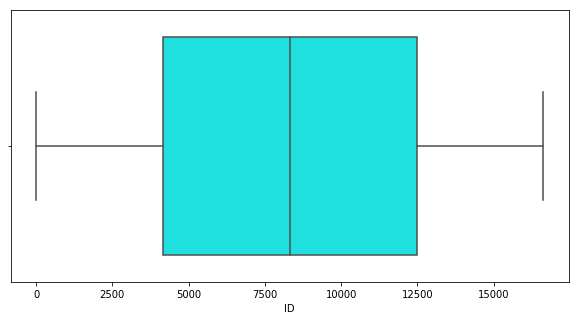

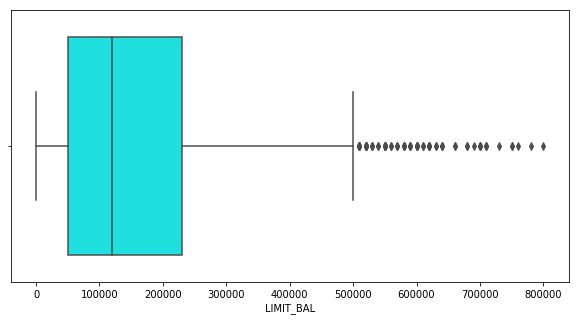

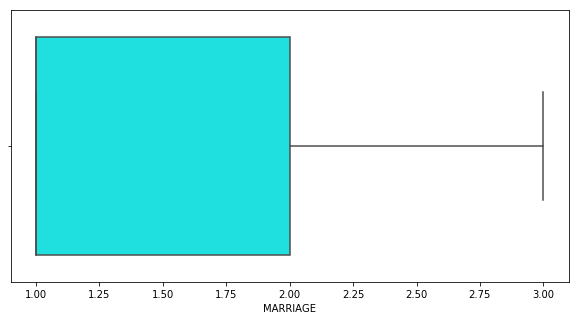

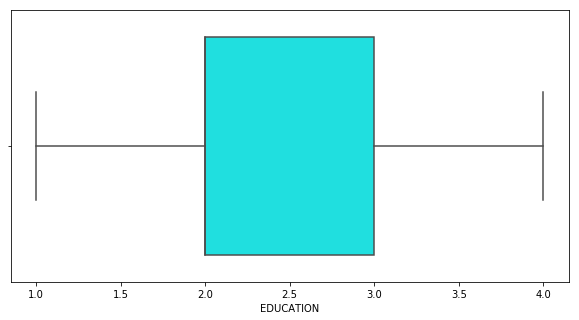

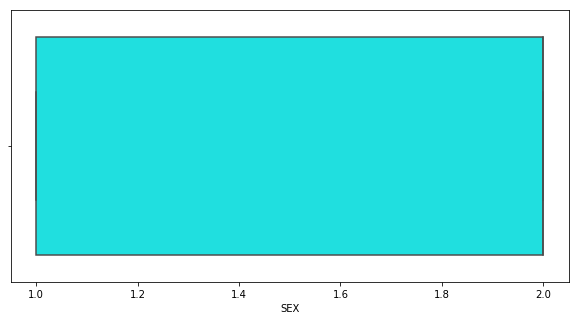

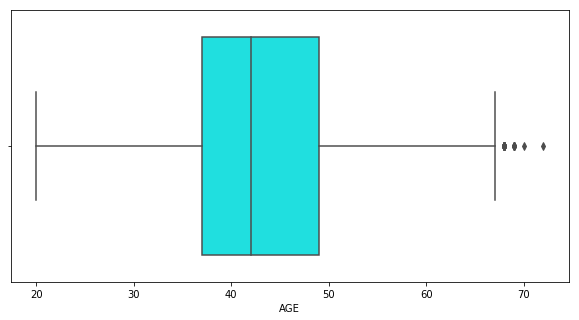

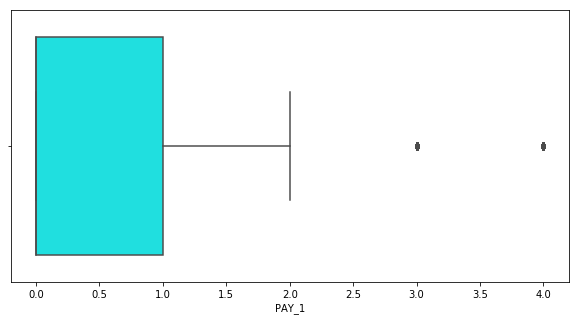

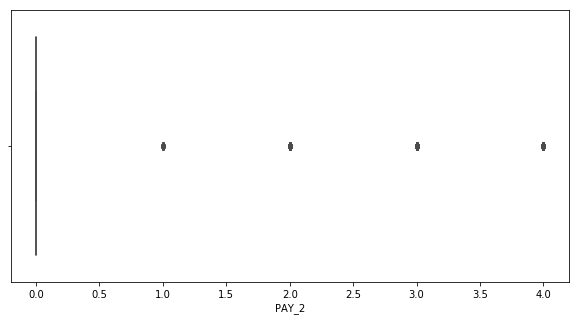

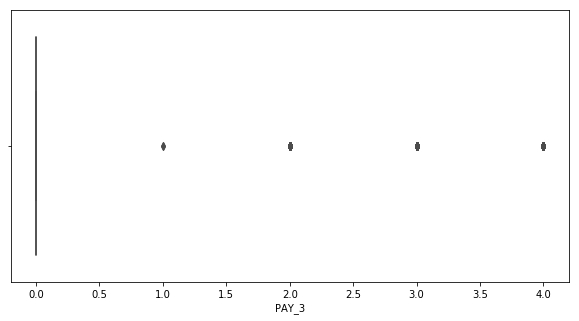

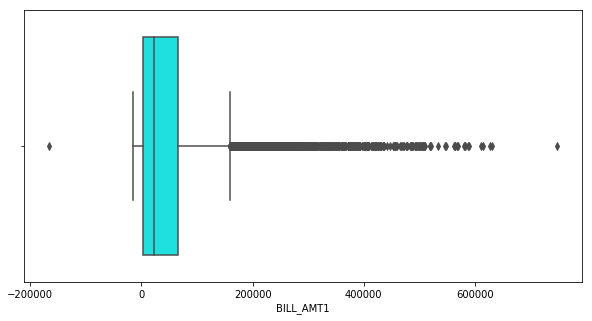

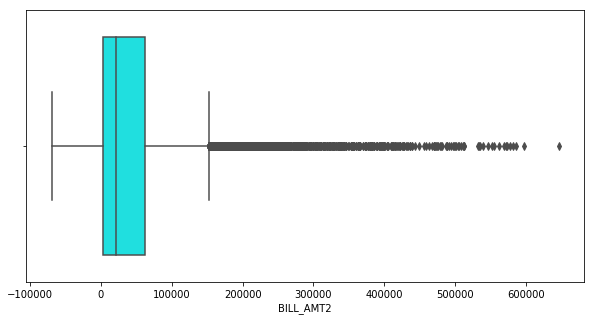

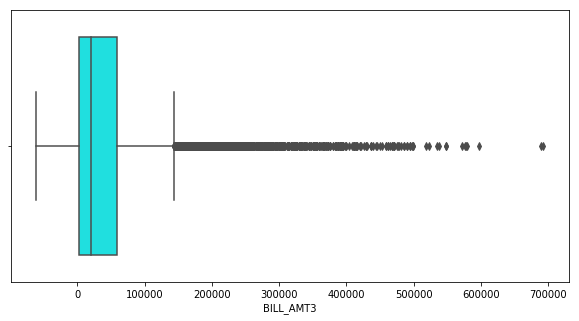

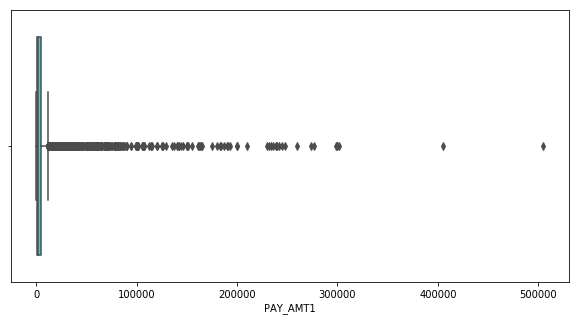

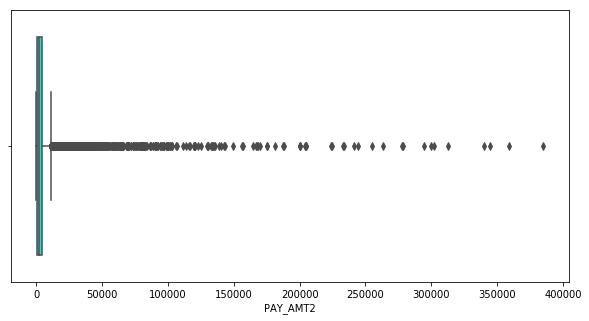

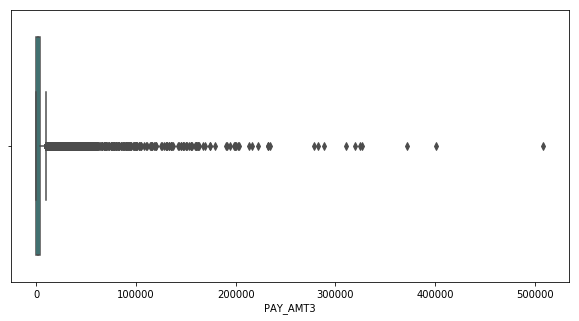

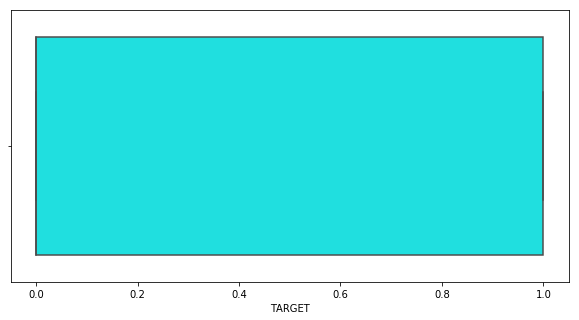

In [52]:
univariate_analysis(data,columns)

### CORRELATION

Untuk melihat besarnya hubungan antar variabel

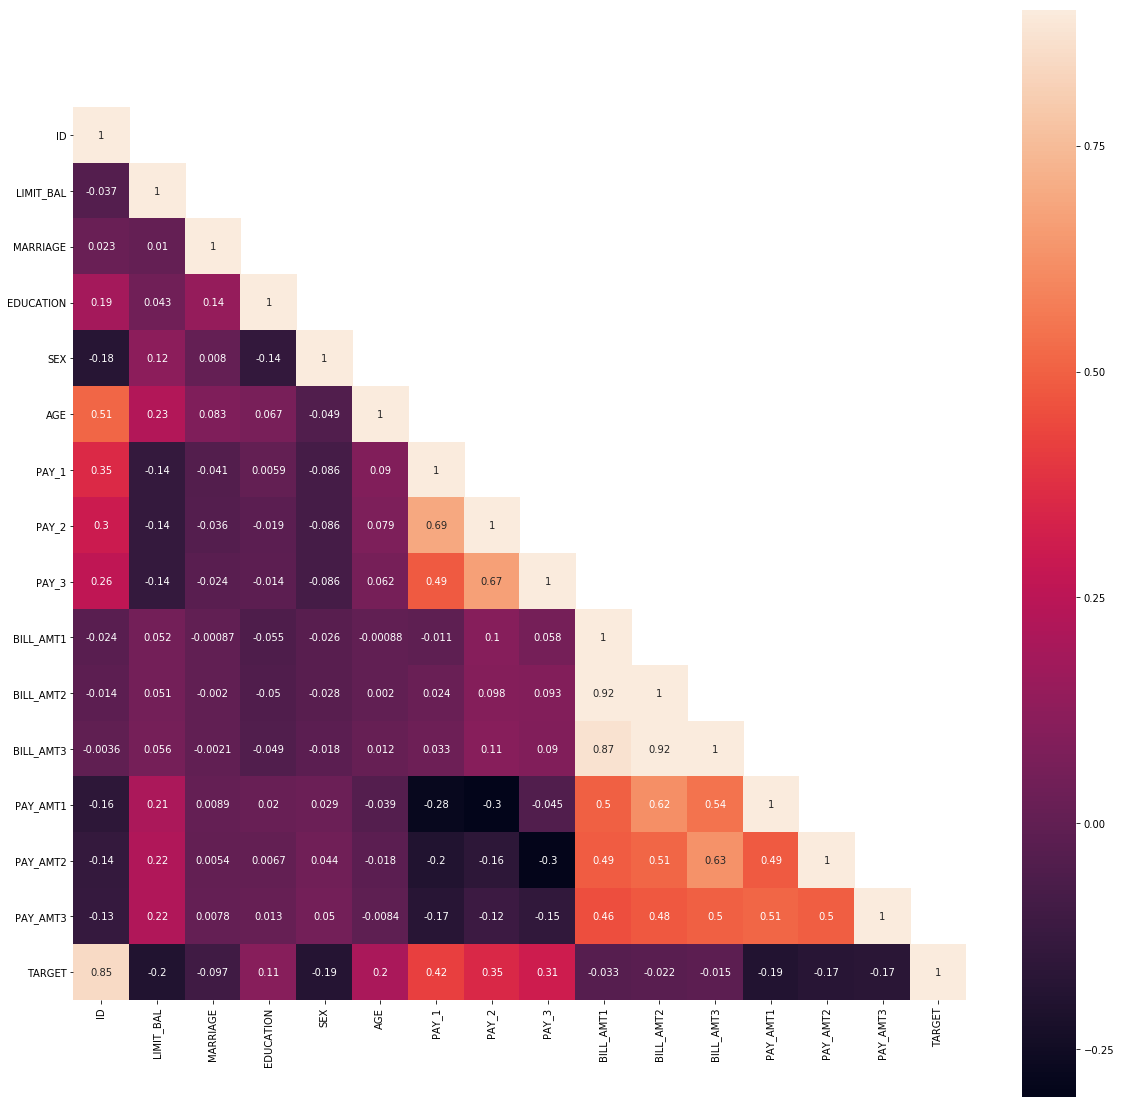

In [11]:
corr = data.corr(method = 'spearman')
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (20,20))
fig.set_size_inches(20,20)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

### BAR PLOT

Untuk melihat komposisi dari berbagai variabel di tabel data
Hasil :
1. Pada data marriage terlihat bahwa pelanggan yang belum menikah lebih banyak dibandingkan yang sudah menikah atau lainnya. 
2. Pada data sex terlihat bahwa pelanggan wanita lebih banyak dibandingkan pelanggan pria
3. Pada data education terlihat bahwa pelanggan yang memiliki pendidikan Dipl/S1 lebih banyak dibandingkan dengan yang lain.
4. Pada data age terlihat bahwa umur pelanggan yang paling banyak terdapat pada range 35-40

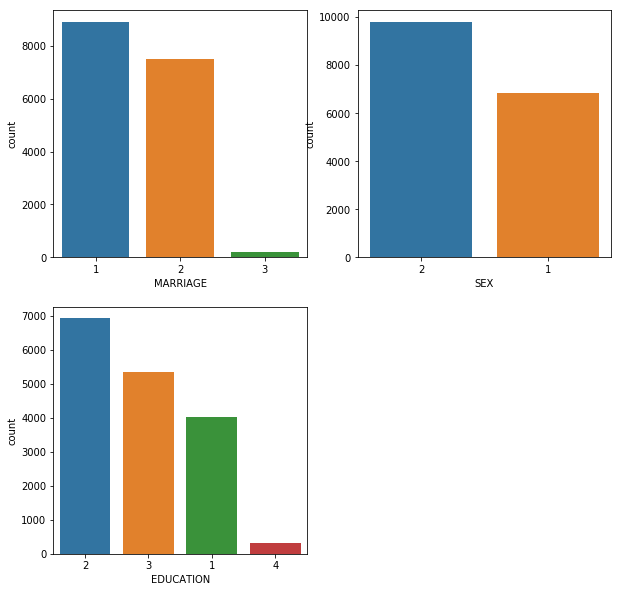

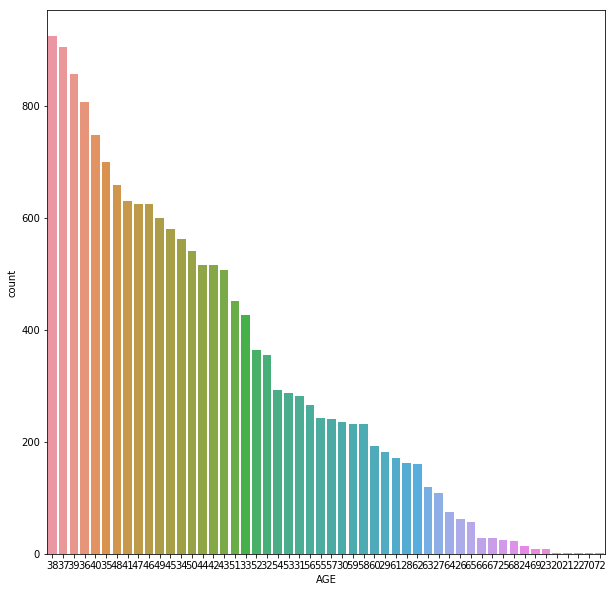

In [12]:
f=plt.figure(figsize=(10,10))
f.add_subplot(2,2,1)
sns.countplot(data['MARRIAGE'],order=data['MARRIAGE'].value_counts().index)
f.add_subplot(2,2,2)
sns.countplot(data['SEX'],order=data['SEX'].value_counts().index)
f.add_subplot(2,2,3)
sns.countplot(data['EDUCATION'],order=data['EDUCATION'].value_counts().index)
plt.figure(figsize=(10,10))
sns.countplot(data['AGE'],order=data['AGE'].value_counts().index)

Dari bar plot dibawah ini dapat diketahui bahwa peminjam paling banyak berasal dari katergori umur Dewasa 

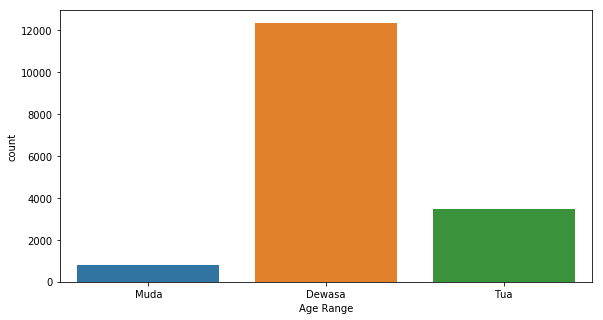

In [310]:
agerange = [20, 30, 50, np.inf]
agename = ['Muda', 'Dewasa', 'Tua']
data['Age Range'] = pd.cut(data['AGE'], agerange, labels=agename)
f = plt.figure(figsize=(21,5))
f.add_subplot(1,2,1)
sns.countplot(data['Age Range'])

plt.show()

### PIE CHART

Untuk melihat komposisi dari pelanggan yang terlambat dan tidak terlambat dalam pembayaran

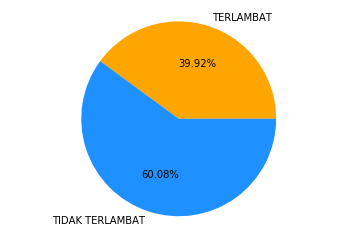

In [13]:
size = [sum(data['TARGET']),
        len(data['TARGET'])-sum(data['TARGET'])]
labels = ['TERLAMBAT','TIDAK TERLAMBAT']
color = ["orange","dodgerblue"]
plt.pie(size,labels=labels,colors=color,autopct='%2.2f%%')
plt.axis('equal')
plt.show()

In [14]:
feature_names = list(data.columns)
do_not_use_for_training = ['TARGET']
feature_names = [f for f in data.columns if f not in do_not_use_for_training]
print('Total features : {}'.format(len(feature_names)))
data[feature_names].count()
y = data['TARGET']

Total features : 15


# K-NEAREST NEIGHBOR

### Train Test Split

In [198]:
X = data.drop(['ID','TARGET'],axis=1)
Y = data['TARGET']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.2, random_state=42) 

### Comparing Error Rate with the K Value

In [199]:
error = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

Text(0,0.5,'Mean Error')

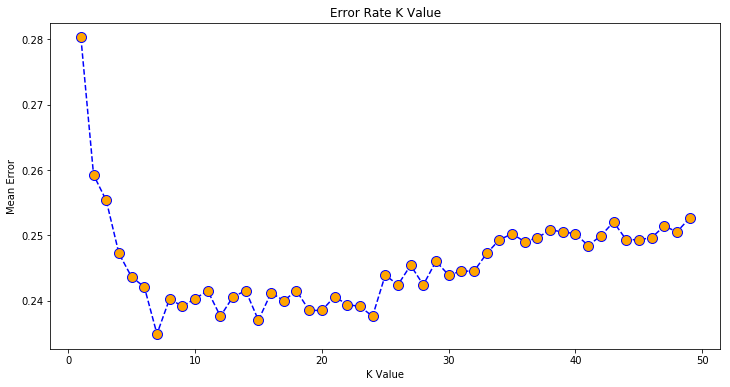

In [200]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='orange', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### Training and Predictions

In [206]:
knn = KNeighborsClassifier(n_neighbors=7)

In [207]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [208]:
Y_pred = knn.predict(X_test)

In [209]:
Y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

### Evaluating the Algorithm

In [210]:
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[1677  321]
 [ 460  867]]
             precision    recall  f1-score   support

          0       0.78      0.84      0.81      1998
          1       0.73      0.65      0.69      1327

avg / total       0.76      0.77      0.76      3325



In [211]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.7651127819548872


In [212]:
compare = Y_test.reset_index()
compare.drop(columns='index', inplace=True)

In [213]:
compare['TARGET PREDIKSI'] = Y_pred

In [214]:
compare.head()

,TARGET,TARGET PREDIKSI
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0


In [215]:
data.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,1,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,2,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,3,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,4,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,5,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


### Testing with data testing

In [176]:
X_testing = datatesting.drop(['ID'],axis=1)
Y_pred = knn.predict(X_testing)

In [177]:
Y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [178]:
X_testing.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
0,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0
1,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0
2,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0
3,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0
4,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0


### Input prediction value to data testing table

In [179]:
X_testing['PREDIKSI TARGET'] = Y_pred

In [180]:
X_testing.head(15)

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,PREDIKSI TARGET
0,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0,0
1,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0,0
2,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0,0
3,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0,0
4,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0,0
5,20000.0,1,1,2,40,0,0,0,17012.0,18181.0,19331.0,1450.0,1600.0,382.0,0
6,200000.0,1,1,2,32,0,0,0,160320.0,162140.0,165431.0,5888.0,5990.0,6031.0,0
7,370000.0,1,1,2,37,0,0,0,43531.0,59801.0,53925.0,20000.0,8000.0,0.0,1
8,160000.0,1,1,2,39,0,0,0,89397.0,90348.0,8274.0,6353.0,1200.0,70000.0,0
9,30000.0,1,1,2,36,2,2,2,27274.0,25744.0,27504.0,0.0,3000.0,1000.0,0


## PIE CHART
Dari chart dibawah ini dapat dilihat bahwa dengan menggunakan KNN, prediksi target yang tidak terlambat lebih banyak dibanding dengan terlambat

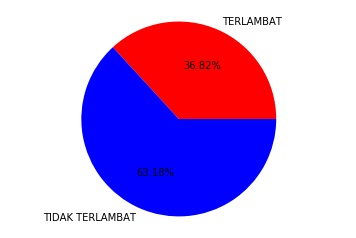

In [181]:
size = [sum(X_testing['PREDIKSI TARGET']),
        len(X_testing['PREDIKSI TARGET'])-sum(X_testing['PREDIKSI TARGET'])]
labels = ['TERLAMBAT','TIDAK TERLAMBAT']
color = ["red","blue"]
plt.pie(size,labels=labels,colors=color,autopct='%2.2f%%')
plt.axis('equal')
plt.show()

## Histogram

Dapat dilihat dari histogram dibawah bahwa banyak pelanggan yang bayar tepat waktu pada pembayaran pertama, akan tetapi pada pembayaran kedua dan ketiga semakin ada yang terlambat melakukan pembayaran

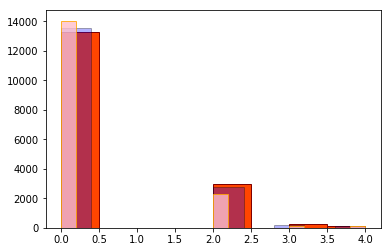

In [197]:
plt.hist(X_testing['PAY_1'], 
         facecolor='orangered', 
         edgecolor='maroon', 
         bins=8)

plt.hist(X_testing['PAY_2'], 
         facecolor='blue', 
         edgecolor='black', 
         bins=10, 
         alpha = 0.3)
plt.hist(X_testing['PAY_3'], 
         facecolor='pink', 
         edgecolor='orange', 
         bins=20, 
         alpha = 0.8)

plt.show()

# RANDOM FOREST

### Train Test Split

In [218]:
X = data.drop(['ID','TARGET'],axis=1)
Y = data['TARGET']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.2, random_state=42) 

### Training and Predictions

In [219]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)

### Evaluating the Algorithm

In [220]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.8839097744360902


In [221]:
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[1840  158]
 [ 228 1099]]
             precision    recall  f1-score   support

          0       0.89      0.92      0.91      1998
          1       0.87      0.83      0.85      1327

avg / total       0.88      0.88      0.88      3325



In [222]:
Y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

### Testing with data testing

In [223]:
X_testing = datatesting.drop(['ID'],axis=1)
Y_pred = rfc.predict(X_testing)

In [224]:
X_testing['PREDIKSI TARGET'] = Y_pred

In [225]:
X_testing.head(15)

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,PREDIKSI TARGET
0,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0,0
1,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0,0
2,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0,0
3,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0,0
4,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0,0
5,20000.0,1,1,2,40,0,0,0,17012.0,18181.0,19331.0,1450.0,1600.0,382.0,0
6,200000.0,1,1,2,32,0,0,0,160320.0,162140.0,165431.0,5888.0,5990.0,6031.0,0
7,370000.0,1,1,2,37,0,0,0,43531.0,59801.0,53925.0,20000.0,8000.0,0.0,0
8,160000.0,1,1,2,39,0,0,0,89397.0,90348.0,8274.0,6353.0,1200.0,70000.0,0
9,30000.0,1,1,2,36,2,2,2,27274.0,25744.0,27504.0,0.0,3000.0,1000.0,0


## PIE CHART

Dari chart dibawah ini dapat dilihat bahwa dengan menggunakan Random Forest, prediksi target yang tidak terlambat lebih banyak dibanding dengan terlambat


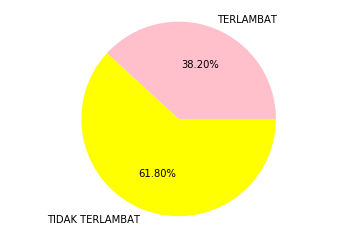

In [226]:
size = [sum(X_testing['PREDIKSI TARGET']),
        len(X_testing['PREDIKSI TARGET'])-sum(X_testing['PREDIKSI TARGET'])]
labels = ['TERLAMBAT','TIDAK TERLAMBAT']
color = ["pink","yellow"]
plt.pie(size,labels=labels,colors=color,autopct='%2.2f%%')
plt.axis('equal')
plt.show()

## Histogram

Dapat dilihat dari histogram dibawah bahwa banyak pelanggan yang bayar tepat waktu pada pembayaran pertama, akan tetapi pada pembayaran kedua dan ketiga semakin ada yang terlambat melakukan pembayaran

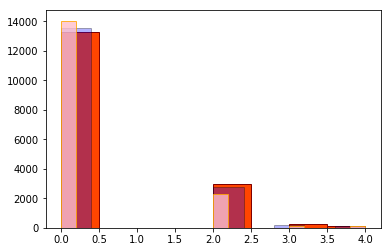

In [227]:
plt.hist(X_testing['PAY_1'], 
         facecolor='orangered', 
         edgecolor='maroon', 
         bins=8)

plt.hist(X_testing['PAY_2'], 
         facecolor='blue', 
         edgecolor='black', 
         bins=10, 
         alpha = 0.3)
plt.hist(X_testing['PAY_3'], 
         facecolor='pink', 
         edgecolor='orange', 
         bins=20, 
         alpha = 0.8)

plt.show()

# NAIVE - BAYES

## Load Data

In [259]:
datanb = pd.read_csv("training.csv")
datanb.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,1,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,2,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,3,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,4,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,5,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


In [260]:
datanb.dtypes

ID             int64
LIMIT_BAL    float64
MARRIAGE       int64
EDUCATION      int64
SEX            int64
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
TARGET         int64
dtype: object

## BUILD MODEL

In [277]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
x = datanb.drop(['ID','AGE','LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','PAY_AMT1','PAY_AMT2','PAY_AMT3','TARGET'],axis=1)
y = datanb['TARGET']
Xtr, Xv, ytr, yv = train_test_split(x, y, test_size=0.3, random_state=1)

In [278]:
naive_bayes = MultinomialNB()
naive_bayes.fit(Xtr, ytr)
predictions = naive_bayes.predict(Xv)

## EVALUATION

In [279]:
#Training Score
naive_bayes.score(Xtr, ytr)

0.7276789550571453

In [280]:
#Testing Score
naive_bayes.score(Xv, yv)

0.7277465918203689

## PREDICTION

In [281]:
Xv['prediction'] = naive_bayes.predict(Xv)
Xv['real_class'] = yv

C:\Users\putrib064183\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\putrib064183\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [282]:
Xv.head()

,MARRIAGE,EDUCATION,SEX,PAY_1,PAY_2,PAY_3,prediction,real_class
12904,1,2,1,4,4,4,1,1
14204,1,2,1,0,0,0,0,1
10934,1,3,1,0,0,0,0,1
11659,2,3,2,0,0,0,0,1
6069,2,1,1,0,0,0,0,0


## CREATE MODEL

In [283]:
from sklearn.externals import joblib
joblib.dump(naive_bayes, 'Testing CS NB.pkl')

['Testing CS NB.pkl']

In [284]:
testing_credit = pd.DataFrame(datatesting)
testing_credit.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
0,1,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0
1,2,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0
2,3,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0
3,4,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0
4,5,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0


In [285]:
testing = testing_credit.drop(['ID','AGE','LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','PAY_AMT1','PAY_AMT2','PAY_AMT3'],axis=1)

In [286]:
testing.head()

,MARRIAGE,EDUCATION,SEX,PAY_1,PAY_2,PAY_3
0,1,1,2,0,0,0
1,1,1,2,2,0,0
2,1,1,2,0,0,0
3,1,1,2,0,0,0
4,1,1,2,0,0,0


In [288]:
naive_bayes_model_load = joblib.load('Testing CS NB.pkl')

In [290]:
testing['prediction'] = naive_bayes_model_load.predict(testing)

In [291]:
testing.head()

,MARRIAGE,EDUCATION,SEX,PAY_1,PAY_2,PAY_3,prediction
0,1,1,2,0,0,0,0
1,1,1,2,2,0,0,1
2,1,1,2,0,0,0,0
3,1,1,2,0,0,0,0
4,1,1,2,0,0,0,0


# KESIMPULAN

### Berdasarkan dari perhitungan diatas dengan menggunakan metode klasifikasi KNN, Random Forest, dan Naive Bayes ternyata metode yang paling baik untuk memprediksi apakah pelanggan kartu kredit beresiko terlambat bayar adalah metode Random Forest dengan akurasi sebesar 0,88